 Data loaded successfully!
  SalesOrderNumber           OrderDate             DueDate  \
0          SO43700  2010-12-29 0:00:00  2011-01-10 0:00:00   
1          SO43701  2010-12-29 0:00:00  2011-01-10 0:00:00   
2          SO43702  2010-12-30 0:00:00  2011-01-11 0:00:00   
3          SO43712  2011-01-01 0:00:00  2011-01-13 0:00:00   
4          SO43717  2011-01-02 0:00:00  2011-01-14 0:00:00   

             ShipDate  CustomerKey       CustomerName Gender  YearlyIncome  \
0  2011-01-05 0:00:00        14501       Ruben Prasad      M         80000   
1  2011-01-05 0:00:00        11003        Christy Zhu      F         70000   
2  2011-01-06 0:00:00        27645        Colin Anand      M        120000   
3  2011-01-08 0:00:00        13513  Abigail Henderson      F         30000   
4  2011-01-09 0:00:00        25249   Alexandra Watson      F         70000   

  MaritalStatus  ProductKey  ... SalesTerritoryKey SalesTerritoryCountry  \
0             M         336  ...                 4     

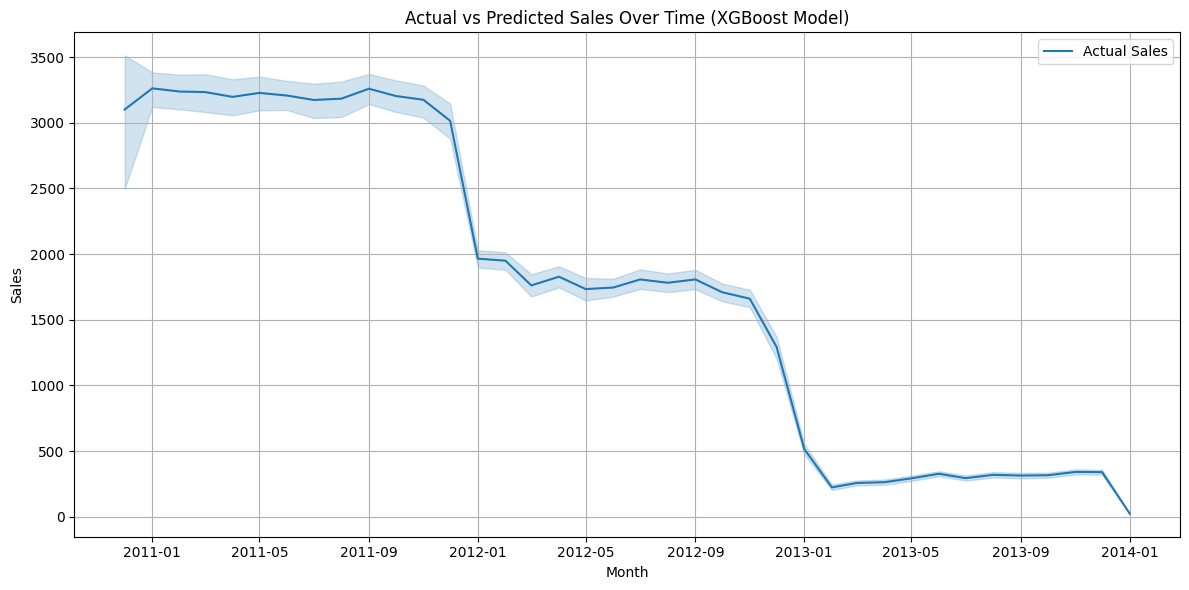

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Data
df = pd.read_csv("../data/cleaned_sales_data.csv")

print(" Data loaded successfully!")
print(df.head())

# Step 3: Create 'Month' column for time-series plotting
df['Month'] = pd.to_datetime(
    df['CalendarYear'].astype(str) + '-' + df['EnglishMonthName'] + '-01',
    format='%Y-%B-%d', errors='coerce'
)

# Step 4: Drop unnecessary columns (optional but clean)
columns_to_drop = ['OrderDate', 'DueDate', 'ShipDate', 'FullDate']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Step 5: Fix data types (optional, good practice)
df = df.astype({
    "SalesAmount": float,           
    "YearlyIncome": 'int64',
    "OrderQuantity": 'int64',
    "UnitPrice": float,
    "TotalProductCost": float,
    "CalendarYear": 'int64'
})


#  Step 6: Export cleaned file for Power BI
df.to_csv("../data/cleaned_sales_predictions.csv", index=False)
print("Cleaned dataset saved to: cleaned_sales_predictions.csv")

#  Step 7: Optional Plot - Actual vs Predicted
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='SalesAmount', data=df, label='Actual Sales')

# sns.lineplot(x='Month', y='PredictedSales', data=df, label='Predicted Sales')

plt.title("Actual vs Predicted Sales Over Time (XGBoost Model)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
